# Compute connected components of Hillman data image

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from skimage import measure
from skimage import filters

In [3]:
# Path to file containing frames
in_fpath = '/Users/cmcgrory/paninski_lab/worm/data/hillman_3.h5'

# Load set of frames from file
with h5py.File(in_fpath, 'r') as f:
    data = np.array(f.get('red'))

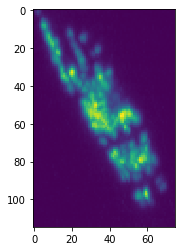

In [13]:
# Section of XY plane where head is found
head_x = (255, 370)
head_y = (115, 190)
head_z = (0, 60)

# Pick frame from data
img = data[head_x[0]:head_x[1], head_y[0]:head_y[1], head_z[0]:head_z[1], 0]

# Display max projection
plt.imshow(np.max(img, 2));

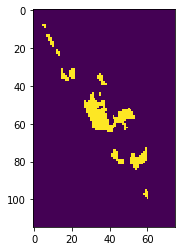

In [12]:
threshold = 3200

# Create binary th
img_th = (img >= threshold).astype('uint16')

# Display max projection
plt.imshow(np.max(img_th, 2));

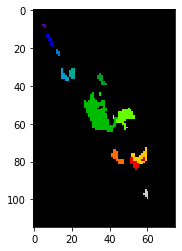

In [6]:
img_labels = measure.label(img_th)
plt.imshow(np.max(img_labels, 2), cmap='nipy_spectral');

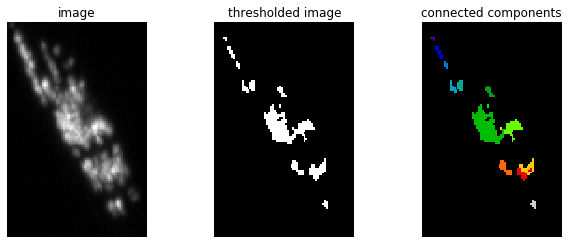

In [17]:
img_mp = np.max(img, 2)
img_th_mp = np.max(img_th, 2)
img_labels_mp = np.max(img_labels, 2)

plt.figure(figsize=(9, 3.5))

plt.subplot(131)
plt.imshow(img_mp, cmap='gray')
plt.axis('off')
plt.title('image')

plt.subplot(132)
plt.imshow(img_th_mp, cmap='gray')
plt.axis('off')
plt.title('thresholded image')

plt.subplot(133)
plt.imshow(img_labels_mp, cmap='nipy_spectral')
plt.axis('off')
plt.title('connected components')

plt.tight_layout()

plt.savefig('components_mp.png')